In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

model_save_path = './PredictModel/5_citys_covid_predict.hdf5'
DATA_PATH = [
    './Data/1_Hà Nội_covid_data.csv', 
    './Data/2_TP HCM_covid_data.csv',
    './Data/3_Hải Phòng_covid_data.csv',
    './Data/55_Cần Thơ_covid_data.csv',
    './Data/4_Đà Nẵng_covid_data.csv',
]

# Data visualizing

In [2]:
df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df[path] = pd.read_csv(DATA_PATH[path])
    df[path].drop(df[path].tail(26).index,inplace=True)
    for idx in range(len(df[path].index)):
        df[path].iat[idx, 0] = datetime.strptime(df[path].iat[idx, 0], '%Y-%m-%d %H:%M:%S')
    df[path] = df[path].sort_values(by=['date'])
    df[path] = df[path].drop(columns=['Unnamed: 9'])

In [3]:
df[0].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,13560,5300471.0,0.0,0.0,6.0,22554.0,0.0,0.0
594,2022-04-13 00:00:00,13818,5314289.0,0.0,0.0,2.0,22556.0,0.0,0.0
634,2022-04-14 00:00:00,12824,5327113.0,0.0,0.0,5.0,22561.0,0.0,0.0
197,2022-04-15 00:00:00,11473,5338586.0,0.0,0.0,4.0,22565.0,0.0,0.0
34,2022-04-16 00:00:00,10291,5353757.0,0.0,0.0,2.0,22567.0,0.0,0.0
607,2022-04-17 00:00:00,8521,5361294.0,0.0,0.0,0.0,22567.0,0.0,0.0
591,2022-04-18 00:00:00,7586,5365758.0,0.0,0.0,0.0,22567.0,0.0,0.0
191,2022-04-19 00:00:00,7911,5377027.0,0.0,0.0,3.0,22570.0,0.0,0.0
111,2022-04-20 00:00:00,7266,5384293.0,0.0,0.0,1.0,22571.0,0.0,0.0
485,2022-04-21 00:00:00,6535,5390828.0,0.0,0.0,0.0,22571.0,0.0,0.0


In [4]:
df[1].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,658,604811.0,0.0,0.0,0.0,19984.0,0.0,0.0
594,2022-04-13 00:00:00,848,605659.0,0.0,0.0,0.0,19984.0,0.0,0.0
634,2022-04-14 00:00:00,877,606536.0,0.0,0.0,0.0,19984.0,0.0,0.0
197,2022-04-15 00:00:00,743,607279.0,0.0,0.0,0.0,19984.0,0.0,0.0
34,2022-04-16 00:00:00,603,607882.0,0.0,0.0,0.0,19984.0,0.0,0.0
607,2022-04-17 00:00:00,427,608309.0,0.0,0.0,0.0,19984.0,0.0,0.0
591,2022-04-18 00:00:00,337,608646.0,0.0,0.0,0.0,19984.0,0.0,0.0
191,2022-04-19 00:00:00,557,609203.0,0.0,0.0,0.0,19984.0,0.0,0.0
111,2022-04-20 00:00:00,179,609382.0,0.0,0.0,0.0,19984.0,0.0,0.0
485,2022-04-21 00:00:00,94,609476.0,0.0,0.0,0.0,19984.0,0.0,0.0


In [5]:
df[2].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,781,723021.0,0.0,0.0,0.0,20119.0,0.0,0.0
594,2022-04-13 00:00:00,1017,724038.0,0.0,0.0,0.0,20119.0,0.0,0.0
634,2022-04-14 00:00:00,1028,725066.0,0.0,0.0,0.0,20119.0,0.0,0.0
197,2022-04-15 00:00:00,849,725915.0,0.0,0.0,0.0,20119.0,0.0,0.0
34,2022-04-16 00:00:00,646,726561.0,0.0,0.0,0.0,20119.0,0.0,0.0
607,2022-04-17 00:00:00,427,726988.0,0.0,0.0,0.0,20119.0,0.0,0.0
591,2022-04-18 00:00:00,337,727325.0,0.0,0.0,0.0,20119.0,0.0,0.0
191,2022-04-19 00:00:00,703,728028.0,0.0,0.0,0.0,20119.0,0.0,0.0
111,2022-04-20 00:00:00,248,728276.0,0.0,0.0,0.0,20119.0,0.0,0.0
485,2022-04-21 00:00:00,94,728370.0,0.0,0.0,0.0,20119.0,0.0,0.0


In [6]:
df[3].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,21783,9634350.0,0.0,0.0,36.0,39344.0,0.0,0.0
594,2022-04-13 00:00:00,23473,9593823.0,0.0,0.0,15.0,39359.0,0.0,0.0
634,2022-04-14 00:00:00,21770,9615593.0,0.0,0.0,19.0,39371.0,0.0,0.0
197,2022-04-15 00:00:00,19176,9689282.0,0.0,0.0,15.0,39386.0,0.0,0.0
34,2022-04-16 00:00:00,17470,9711632.0,0.0,0.0,7.0,39393.0,0.0,0.0
607,2022-04-17 00:00:00,14571,9723172.0,0.0,0.0,1.0,39394.0,0.0,0.0
591,2022-04-18 00:00:00,13013,9730379.0,0.0,0.0,7.0,39401.0,0.0,0.0
191,2022-04-19 00:00:00,12850,9781341.0,0.0,0.0,22.0,39423.0,0.0,0.0
111,2022-04-20 00:00:00,12633,9793974.0,0.0,0.0,6.0,39429.0,0.0,0.0
485,2022-04-21 00:00:00,11387,9805352.0,0.0,0.0,6.0,39435.0,0.0,0.0


In [7]:
df[4].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,1016,817575.0,0.0,0.0,0.0,20456.0,0.0,0.0
594,2022-04-13 00:00:00,1400,818975.0,0.0,0.0,0.0,20456.0,0.0,0.0
634,2022-04-14 00:00:00,1344,820319.0,0.0,0.0,0.0,20456.0,0.0,0.0
197,2022-04-15 00:00:00,1039,821358.0,0.0,0.0,0.0,20456.0,0.0,0.0
34,2022-04-16 00:00:00,871,822229.0,0.0,0.0,0.0,20456.0,0.0,0.0
607,2022-04-17 00:00:00,558,822787.0,0.0,0.0,0.0,20456.0,0.0,0.0
591,2022-04-18 00:00:00,468,823124.0,0.0,0.0,0.0,20456.0,0.0,0.0
191,2022-04-19 00:00:00,909,824155.0,0.0,0.0,0.0,20456.0,0.0,0.0
111,2022-04-20 00:00:00,377,824532.0,0.0,0.0,0.0,20456.0,0.0,0.0
485,2022-04-21 00:00:00,298,824830.0,0.0,0.0,0.0,20456.0,0.0,0.0


In [8]:
# Summary Stats
df[0].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000
mean,5479.001342,5.136982e+05,289.953020,6690.426846,30.369128,6422.41745,8.875168,1639.928859
std,15521.184400,1.238343e+06,1653.040662,22495.101877,71.894650,8992.14423,37.300498,2406.029420
min,0.000000,3.600000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,7.020000e+02,0.000000,0.000000,0.000000,31.00000,0.000000,29.000000
50%,14.000000,1.169000e+03,0.000000,26.000000,0.000000,31.00000,0.000000,657.000000
75%,3965.000000,4.454460e+05,4.000000,124.000000,30.000000,16750.00000,2.000000,1072.000000
max,93973.000000,5.477821e+06,38559.000000,128636.000000,666.000000,22579.00000,400.000000,6656.000000


In [9]:
# Summary Stats
df[1].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,812.915436,166020.140940,269.308725,6088.205369,26.833557,6100.444295,0.955705,198.409396
std,1642.514718,230037.019851,1636.017589,21442.775651,71.744706,8515.300618,5.012557,240.791912
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,2.000000,254.000000,0.000000,4.000000,0.000000,0.000000,0.000000,78.000000
75%,927.000000,425116.000000,0.000000,21.000000,4.000000,16575.000000,0.000000,242.000000
max,16024.000000,610091.000000,38417.000000,126088.000000,658.000000,19984.000000,81.000000,692.000000


In [10]:
# Summary Stats
df[2].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.00000
mean,974.059060,177816.452349,269.394631,6090.381208,27.014765,6115.998658,0.971812,202.34094
std,1774.976639,252059.912656,1636.039735,21446.637040,71.697888,8540.675690,5.014282,245.16055
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.00000
50%,2.000000,263.000000,0.000000,4.000000,0.000000,0.000000,0.000000,81.00000
75%,1227.000000,425187.000000,0.000000,22.000000,7.000000,16575.000000,0.000000,249.00000
max,16027.000000,729332.000000,38417.000000,126088.000000,658.000000,20119.000000,81.000000,704.00000


In [11]:
# Summary Stats
df[3].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,10177.609396,1.000437e+06,544.652349,11928.193289,95.318121,9881.966443,11.354362,2329.201342
std,26833.797936,2.272668e+06,2295.413483,42024.019788,1149.771830,14540.365884,39.452000,3068.398204
min,0.000000,5.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.091000e+03,0.000000,0.000000,0.000000,35.000000,0.000000,38.000000
50%,30.000000,2.737000e+03,1.000000,63.000000,0.000000,35.000000,0.000000,1012.000000
75%,9529.000000,9.242790e+05,11.000000,381.000000,75.000000,21657.000000,4.000000,2526.000000
max,165556.000000,9.918804e+06,42955.000000,228369.000000,31320.000000,69685.000000,404.000000,8525.000000


In [12]:
# Summary Stats
df[4].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1111.455034,188829.421477,275.857718,6245.222819,27.493960,6188.602685,1.773154,477.748993
std,1923.110313,271926.834870,1645.266610,21943.398158,71.890151,8614.261450,5.950814,468.329340
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,480.000000,0.000000,0.000000,0.000000,31.000000,0.000000,18.000000
50%,6.000000,735.000000,0.000000,5.000000,0.000000,31.000000,0.000000,441.000000
75%,1593.000000,430648.000000,2.000000,59.000000,10.000000,16680.000000,0.000000,667.000000
max,16130.000000,826536.000000,38501.000000,126855.000000,662.000000,20456.000000,81.000000,1321.000000


In [13]:
df_filtered = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df_filtered[path] = df[path][df[path]['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]

<AxesSubplot:xlabel='date'>

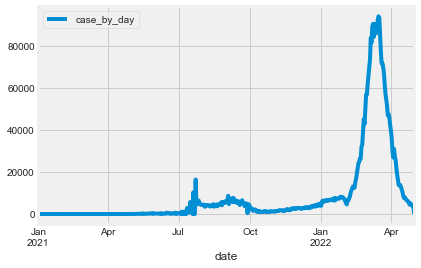

In [14]:
df_filtered[0].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

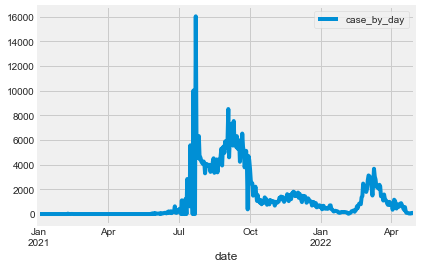

In [15]:
df_filtered[1].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

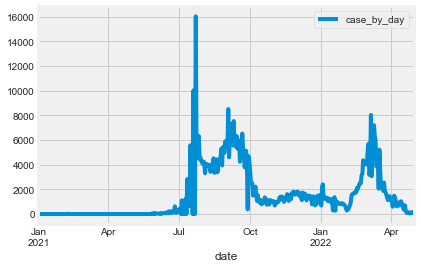

In [16]:
df_filtered[2].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

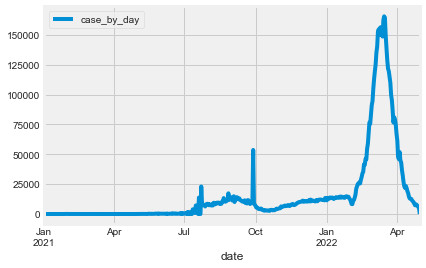

In [17]:
df_filtered[3].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

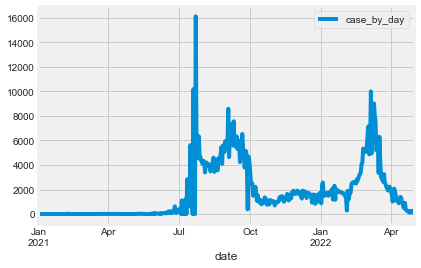

In [18]:
df_filtered[4].plot(x ='date', y='case_by_day', kind = 'line')

# Predicting case by day

In [19]:
new_df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    new_df[path] = df_filtered[path].set_index('date')

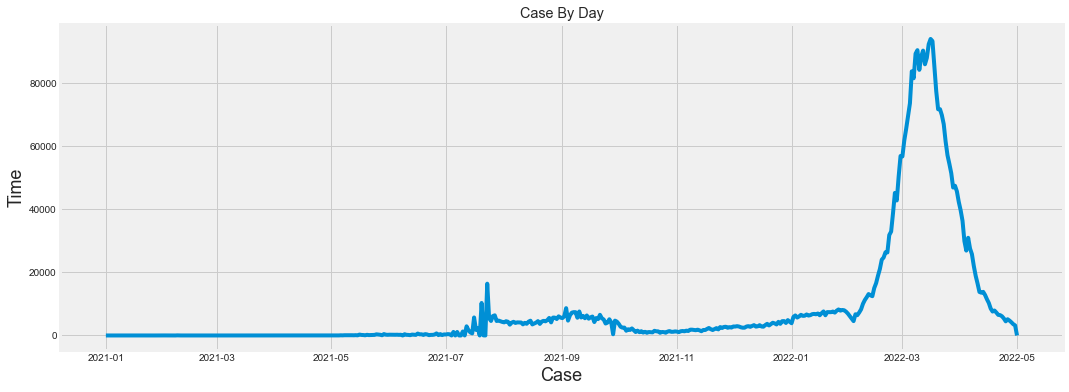

In [20]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[0]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

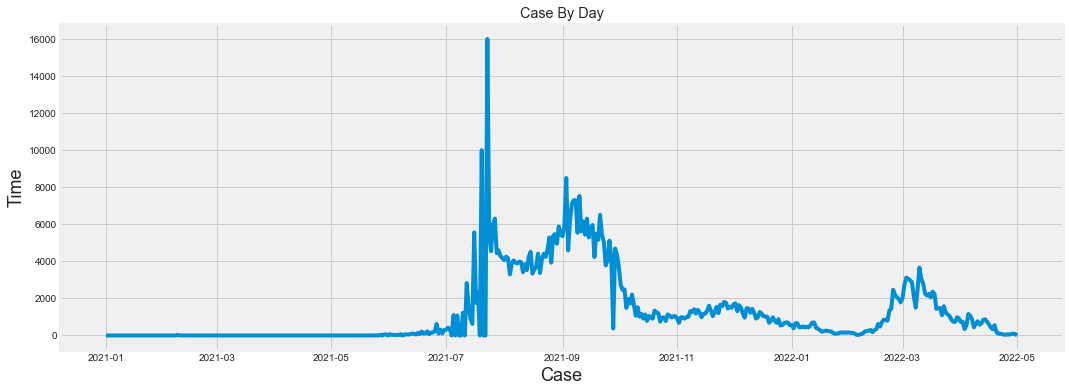

In [21]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[1]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

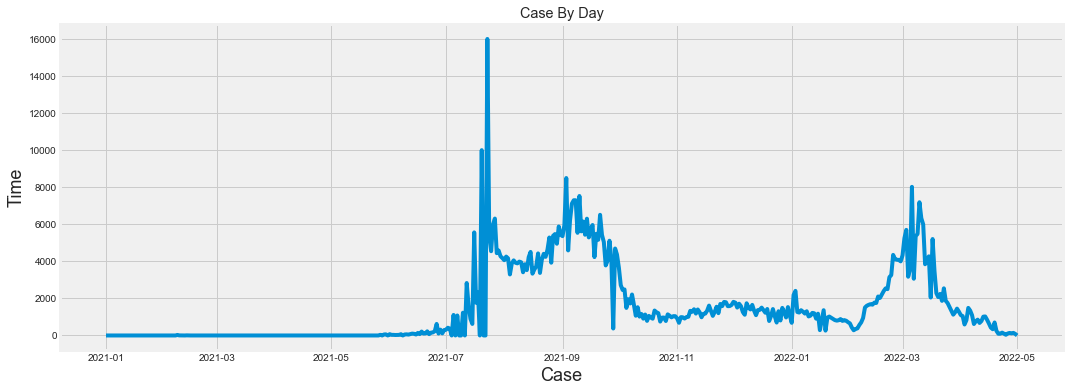

In [22]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[2]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

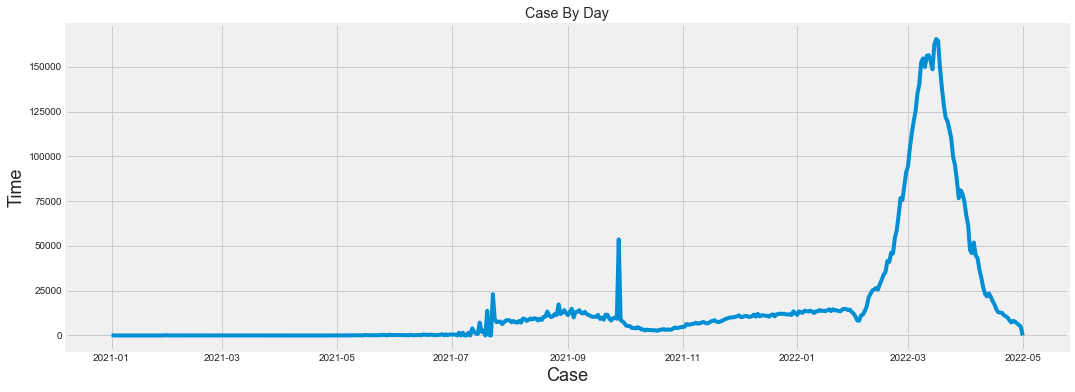

In [23]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[3]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

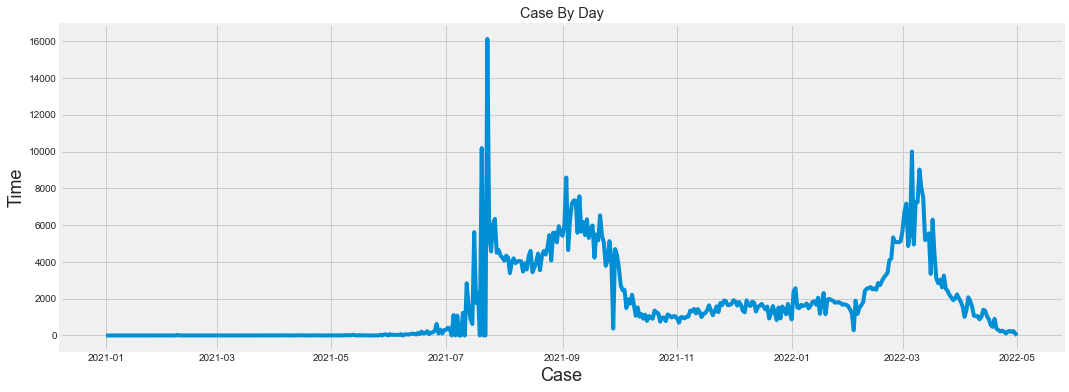

In [24]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[4]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [25]:
data = [None] * len(DATA_PATH)
dataset = [None] * len(DATA_PATH)
training_data_len = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create a new dataframe with only the 'Close column 
    data[path] = new_df[path].filter(['case_by_day'])
    # Convert the dataframe to a numpy array
    dataset[path] = data[path].values
    # Get the number of rows to train the model on
    # training_data_len[path] = int(np.ceil(len(dataset[path]) * .95 ))
    training_data_len[path] = len(dataset[path]) - 30
    print(training_data_len[path])

456
456
456
456
456


In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = [None] * len(DATA_PATH)
scaled_data = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    scaler[path] = MinMaxScaler(feature_range=(0,1))
    scaled_data[path] = scaler[path].fit_transform(dataset[path])

scaled_data

[array([[0.00000000e+00],
        [2.12827089e-05],
        [5.32067722e-05],
        [2.12827089e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.25654177e-05],
        [5.32067722e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.12827089e-05],
        [1.06413544e-05],
        [4.25654177e-05],
        [0.00000000e+00],
        [1.06413544e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.06413544e-05],
        [2.12827089e-05],
        [0.00000000e+00],
        [8.51308355e-05],
        [2.12827089e-04],
        [1.06413544e-04],
        [1.38337608e-04],
        [1.38337608e-04],
        [1.06413544e-04],
        [5.32067722e-05],
        [3.19240633e-05],
        [4.25654177e-05],
        [3.19240633e-05],
        [0.00000000e+00],
        [3.7

In [27]:
DATA_LEN = 60
train_data = [None] * len(DATA_PATH)
test_data = [None] * len(DATA_PATH)
x_train = [None] * len(DATA_PATH)
y_train = [None] * len(DATA_PATH)
x_test = [None] * len(DATA_PATH)
y_test = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create the training data set 
    # Create the scaled training data set
    train_data[path] = scaled_data[path][0:int(training_data_len[path]), :]
    # Split the data into x_train and y_train data sets
    x_train[path] = []
    y_train[path] = []

    for idx in range(DATA_LEN, len(train_data[path])):
        x_train[path].append(train_data[path][idx - DATA_LEN: idx, 0])
        y_train[path].append(train_data[path][idx, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train[path], y_train[path] = np.array(x_train[path]), np.array(y_train[path])

    # Reshape the data
    x_train[path] = np.reshape(x_train[path], (x_train[path].shape[0], x_train[path].shape[1], 1))
    
    # Create the testing data set
    test_data[path] = scaled_data[path][training_data_len[path] - DATA_LEN: , :]
    # Create the data sets x_test and y_test
    x_test[path] = []
    y_test[path] = scaled_data[path][training_data_len[path]:, :]
    for i in range(DATA_LEN, len(test_data[path])):
        x_test[path].append(test_data[path][i - DATA_LEN: i, 0])

    # Convert the data to a numpy array
    x_test[path], y_test[path] = np.array(x_test[path]), np.array(y_test[path])

    # Reshape the data
    x_test[path] = np.reshape(x_test[path], (x_test[path].shape[0], x_test[path].shape[1], 1 ))
    
x_train, y_train, x_test, y_test

([array([[[0.00000000e+00],
          [2.12827089e-05],
          [5.32067722e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[2.12827089e-05],
          [5.32067722e-05],
          [2.12827089e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[5.32067722e-05],
          [2.12827089e-05],
          [3.19240633e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         ...,
  
         [[8.49712151e-02],
          [8.02996605e-02],
          [7.36381727e-02],
          ...,
          [5.47284858e-01],
          [4.98909261e-01],
          [5.04964192e-01]],
  
         [[8.02996605e-02],
          [7.36381727e-02],
          [6.52421440e-02],
          ...,
          [4.98909261e-01],
          [5.04964192e-01],
          [4.86086429e-01]],
  
         [[7.36381727e-02],
          [6.5242144

In [28]:
from functools import reduce

X_train = x_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_train[1:], x_train[0])
Y_train = y_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_train[1:], y_train[0])
X_test = x_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_test[1:], x_test[0])
Y_test = y_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_test[1:], y_test[0])

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() 
model.add(LSTM(30, return_sequences=True, input_shape=(DATA_LEN, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                4080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,141
Trainable params: 8,141
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the model
model.fit(
    X_train, 
    Y_train, 
    batch_size=8, 
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
50/50 [==============================] - 15s 110ms/step - loss: 0.2459 - val_loss: 0.2685
Epoch 2/50
50/50 [==============================] - 3s 56ms/step - loss: 0.0948 - val_loss: 0.0378
Epoch 3/50
50/50 [==============================] - 2s 45ms/step - loss: 0.0643 - val_loss: 0.0245
Epoch 4/50
50/50 [==============================] - 2s 45ms/step - loss: 0.0554 - val_loss: 0.0085
Epoch 5/50
50/50 [==============================] - 2s 44ms/step - loss: 0.0530 - val_loss: 0.0102
Epoch 6/50
50/50 [==============================] - 2s 49ms/step - loss: 0.0506 - val_loss: 0.0072
Epoch 7/50
50/50 [==============================] - 2s 45ms/step - loss: 0.0509 - val_loss: 0.0084
Epoch 8/50
50/50 [==============================] - 2s 47ms/step - loss: 0.0497 - val_loss: 0.0064
Epoch 9/50
50/50 [==============================] - 2s 47ms/step - loss: 0.0482 - val_loss: 0.0101
Epoch 10/50
50/50 [==============================] - 2s 45ms/step - loss: 0.0481 - val_loss: 0.0116
Epoch 1

In [32]:
train_predictions = [None] * len(DATA_PATH)
test_predictions = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Get the models predicted price values
    train_predictions[path] = model.predict(x_train[path])
    test_predictions[path] = model.predict(x_test[path])
    train_predictions[path] = scaler[path].inverse_transform(train_predictions[path])
    test_predictions[path] = scaler[path].inverse_transform(test_predictions[path])

    # Get the root mean squared error (RMSE)
    # train_rmse = np.sqrt(np.mean(((train_predictions[path] - scaler.inverse_transform(y_train[path])) ** 2)))
    test_rmse = np.sqrt(np.mean(((test_predictions[path] - scaler[path].inverse_transform(y_test[path])) ** 2)))
    print(test_rmse)

2711.463652823846
450.7069649735753
472.3461448196355
4745.988810628546
531.8847422392805


In [33]:
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

4/4 [==============================] - 0s 8ms/step - loss: 0.0102


In [34]:
train = [None] * len(DATA_PATH)
test_valid = [None] * len(DATA_PATH)
train_valid = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    train[path] = data[path][:training_data_len[path]]
    test_valid[path] = data[path][training_data_len[path]:]
    test_valid[path].insert(1, 'case_by_day_test_predict', test_predictions[path])
    train_valid[path] = data[path][60:training_data_len[path]]
    train_valid[path].insert(1, 'case_by_day_train_predict', train_predictions[path])

In [35]:
# for path in range(len(DATA_PATH)):
#     for idx in range(len(valid[path].index)):
#         valid[path].iat[idx, 0] = 0 if valid[path].iat[idx, 0] < 0 else valid[path].iat[idx, 0]
#         valid[path].iat[idx, 1] = 0 if valid[path].iat[idx, 1] < 0 else valid[path].iat[idx, 1]

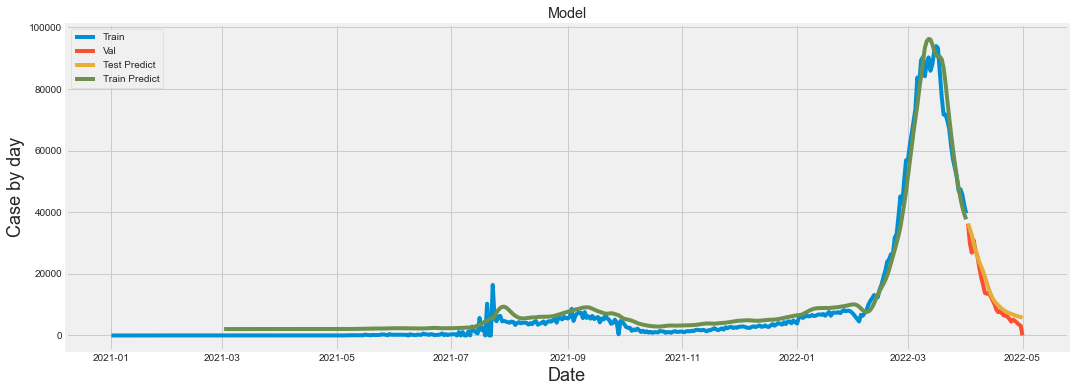

In [36]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[0]['case_by_day'])
plt.plot(test_valid[0][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[0]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [37]:
# # Show the valid and predicted prices
# valid[0]

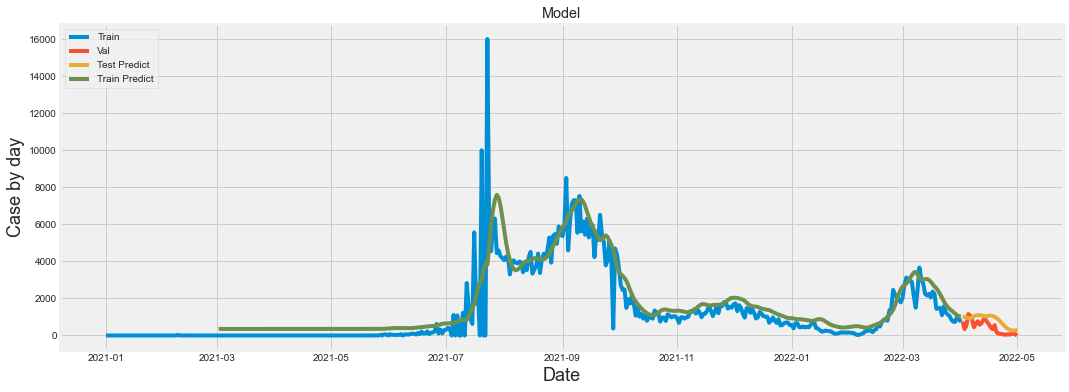

In [38]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[1]['case_by_day'])
plt.plot(test_valid[1][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[1]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [39]:
# # Show the valid and predicted prices
# valid[1]

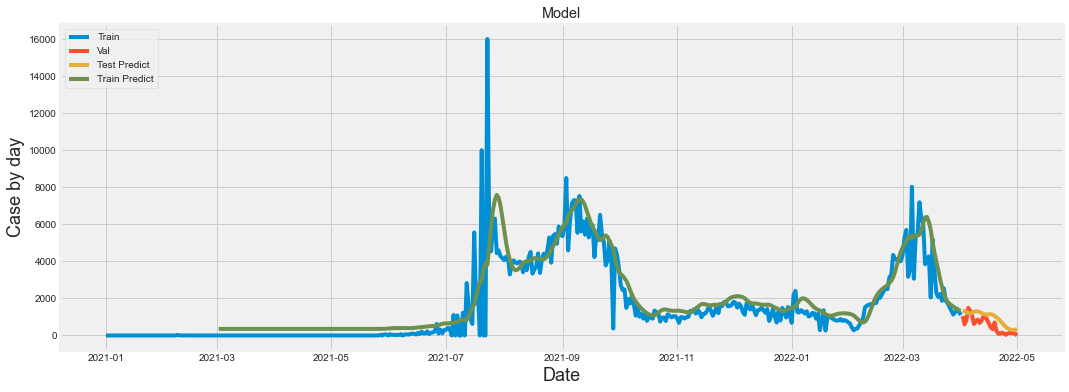

In [40]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[2]['case_by_day'])
plt.plot(test_valid[2][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[2]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [41]:
# # Show the valid and predicted prices
# valid[2]

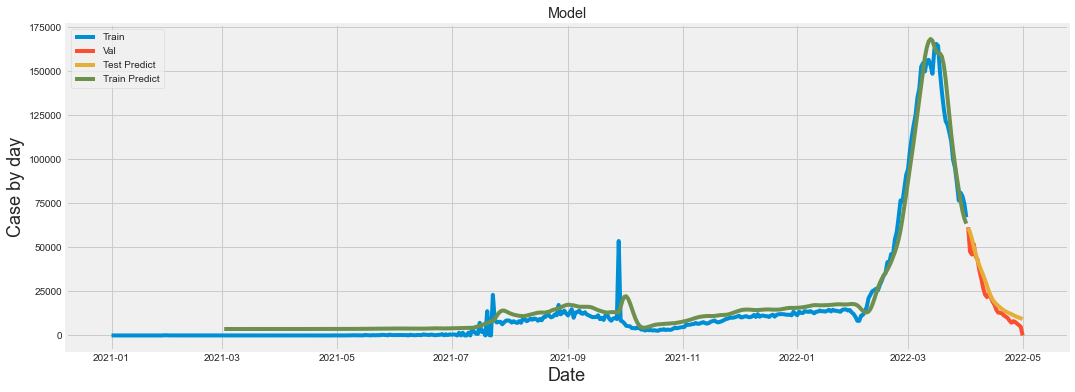

In [42]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[3]['case_by_day'])
plt.plot(test_valid[3][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[3]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [43]:
# # Show the valid and predicted prices
# valid[3]

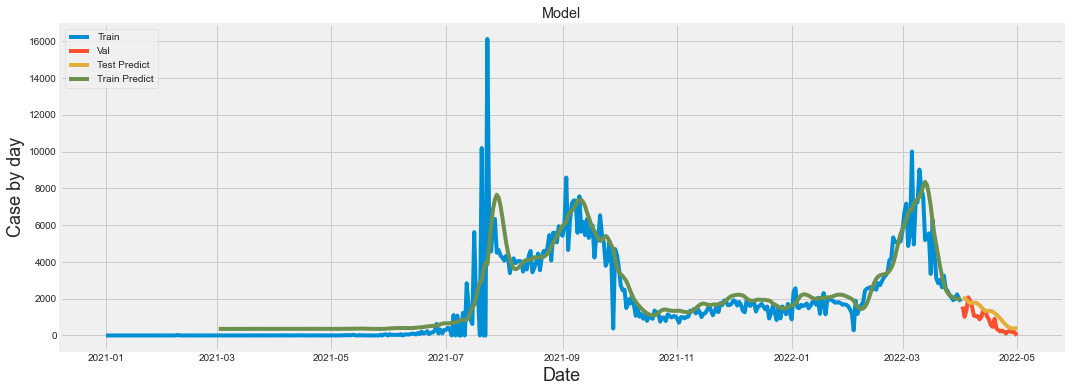

In [44]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[4]['case_by_day'])
plt.plot(test_valid[4][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[4]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [45]:
# # Show the valid and predicted prices
# valid[4]

In [46]:
model.save(model_save_path, include_optimizer=False)